## Final Project Submission

Please fill out:
* Student name: James Brochhausen
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import os, glob
os.listdir()

['LICENSE.md',
 'Back up Copy!.ipynb',
 'student.ipynb',
 'awesome.gif',
 'README.md',
 '.gitignore',
 'CONTRIBUTING.md',
 '.ipynb_checkpoints',
 '.learn',
 '.git',
 'module1_project_rubric.pdf',
 'zippedData']

In [2]:
os.listdir('zippedData/')

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
files_list = glob.glob('zippedData/*')
files_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.read_csv(files_list[0])

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


## Notes on Files

I want to merge: ?

My questions: 
- Which genres are the most profitable over the past 20 years
- What rated films profited the most over the past 20 years
- What top 5 directors had the highest grossing movies over the past 20 years
- What month of the year has the global gross profit / box office?
- What's the average budget spent on films over the past 20 years? Or which budget has the highest ROI on average?
- Take a look at profits

I'll be able to present what genre, film rating, 5 directors and month and budget that'll be the most profitable for Microsoft.

Join / merge 1, 2 = g

### Columns of interest

#### IMDB
- DF 1
    - imdb.movies.csv.gz
    - Columns of interest:
    - genre_ids, id, popularity, release_date, title, vote_average, vote_count
- DF 2
    - imdb.title.akas.csv.gz
    - Columns of interest:
    - title, region, 
- DF 3
    - imdb.title.ratings.csv.gz
    - Columns of interest:
    - tconst, averagerating, numvotes
- DF 4
    - imdb.name.basics.csv.gz
    - Columns of interest:
    - nconst, primary_name, primary_profession, known_for_titles
- DF 6
    - imdb.title.basics.csv.gz
    - Columns of interest:
    - tconst, primary_title, start_year, runtime_minutes, genres

#### Rotten Tomatoes
- DF 5
    - rt.reviews.tsv.gz
    - Columns of interest:
    - No columns of interest
- DF 7
    - rt.movie_info.tsv.gz
    - Columns of interest:
    - rating, genre, director, writer, theater_date, box_office, runtime
    
#### Miscellaneous
- DF 8
    - tn.movie_budgets.csv.gz
    - Columns of interest:
    - release_date, id, movie, production_budget, domestic_gross, worldwide_gross
- DF 9
    - bom.movie_gross.csv.gz
    - Columns of interest:
    - title, domestic_gross, foreign_gross, year
    
    
#### Columns of no interest
- DF 0
    - imdb.title.crew.csv.gz
    - Column names are of no interest
- DF 10
    - imdb.title.principals.csv.gz
    - Columns of interest:
    - No columns of interest

In [6]:
from matplotlib.ticker import FuncFormatter

def reformat_large_tick_values(tick_val, pos):
    """
    Source = https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

In [7]:
DATA = {}
for file in files_list:
    key = file.split('/')[-1]
    print(file)
    try:
        df = pd.read_csv(file)
    except:
        df = pd.read_csv(file, sep='\t',encoding = 'Latin-1')
    DATA[key] = df

zippedData/imdb.title.crew.csv.gz
zippedData/tmdb.movies.csv.gz
zippedData/imdb.title.akas.csv.gz
zippedData/imdb.title.ratings.csv.gz
zippedData/imdb.name.basics.csv.gz
zippedData/rt.reviews.tsv.gz
zippedData/imdb.title.basics.csv.gz
zippedData/rt.movie_info.tsv.gz
zippedData/tn.movie_budgets.csv.gz
zippedData/bom.movie_gross.csv.gz
zippedData/imdb.title.principals.csv.gz


In [8]:
for filename, df in DATA.items():
    print(filename)
    print(len(df))
    display(df.head())
    print()

imdb.title.crew.csv.gz
146144


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943



tmdb.movies.csv.gz
26517


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



imdb.title.akas.csv.gz
331703


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0



imdb.title.ratings.csv.gz
73856


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21



imdb.name.basics.csv.gz
606648


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"



rt.reviews.tsv.gz
54432


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



imdb.title.basics.csv.gz
146144


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"



rt.movie_info.tsv.gz
1560


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



tn.movie_budgets.csv.gz
5782


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



bom.movie_gross.csv.gz
3387


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



imdb.title.principals.csv.gz
1028186


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


## Genre - Done

In [9]:
df_tn_budget = pd.read_csv(files_list[8])

In [10]:
df_imdb_genres = pd.read_csv(files_list[6])

In [11]:
# Merging two dataframes to compare genres and worldwide_gross
df_merge = pd.merge(df_tn_budget, df_imdb_genres, left_on = 'movie', right_on = 'primary_title')
df_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,"$10,000","$94,596","$94,596",tt5936960,Cure,Cure,2014,NaN,NaN
3811,70,"Apr 1, 1996",Bang,"$10,000",$527,$527,tt6616538,Bang,Bang,2015,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,"$9,000","$4,584","$4,584",tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [12]:
# Viewing which columns have null values in df_merge
df_merge.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         1
start_year             0
runtime_minutes      487
genres                72
dtype: int64

In [13]:
# Testing how to convert string to integers, while removing symbols
test = df_merge['domestic_gross'][0]
test

'$760,507,625'

In [14]:
type(test)

str

In [15]:
test.replace(',','').replace('$','')

'760507625'

In [16]:
#converted production, domestic and worldwide into integers
df_merge['domestic_gross'] = df_merge['domestic_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [17]:
df_merge['production_budget'] = df_merge['production_budget'].map(lambda x: float(x.replace(',','').replace('$','')))

In [18]:
df_merge['worldwide_gross'] = df_merge['worldwide_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [19]:
df_merge

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...
3810,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt5936960,Cure,Cure,2014,NaN,NaN
3811,70,"Apr 1, 1996",Bang,10000.0,527.0,5.270000e+02,tt6616538,Bang,Bang,2015,NaN,NaN
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [20]:
#removed columns with null values in genre
df_merge = df_merge[df_merge['genres'].notna()]
df_merge.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
tconst                 0
primary_title          0
original_title         0
start_year             0
runtime_minutes      434
genres                 0
dtype: int64

In [21]:
df_merge['Profits'] = (df_merge['worldwide_gross'] - df_merge['production_budget'])
df_merge.head()

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",1.072414e+09
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",1.748134e+09


In [22]:
# df_merge['genres'] = df_merge['genres'].str.split(",")

In [23]:
# Creates a long string 
combined = ','.join(df_merge['genres'])
# splitting on ',' to make a list and using set to find the unique values
all_genres = list(set(combined.split(',')))
#achieved finding all Genres used
all_genres

['Comedy',
 'Family',
 'Music',
 'Animation',
 'Reality-TV',
 'Sci-Fi',
 'Sport',
 'Romance',
 'Documentary',
 'Biography',
 'Drama',
 'History',
 'Fantasy',
 'Crime',
 'Action',
 'War',
 'Thriller',
 'News',
 'Mystery',
 'Musical',
 'Adventure',
 'Western',
 'Horror']

In [24]:
# create empy dataframe
genre_df = pd.DataFrame()
for genre in all_genres:
    genre_df[genre] = df_merge['genres'].str.contains(genre).astype(int)
genre_df

,Comedy,Family,Music,Animation,Reality-TV,Sci-Fi,Sport,Romance,Documentary,Biography,...,Crime,Action,War,Thriller,News,Mystery,Musical,Adventure,Western,Horror
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3813,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [25]:
df = pd.concat([df_merge,genre_df], axis = 1)
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,...,Crime,Action,War,Thriller,News,Mystery,Musical,Adventure,Western,Horror
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,...,0,0,0,0,0,0,0,0,0,1
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,...,0,1,0,0,0,0,0,1,0,0
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,...,0,1,0,0,0,0,0,1,0,0
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0,1,0,0,0,0,0,1,0,0
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3808,67,"Apr 28, 2006",Clean,10000.0,138711.0,1.387110e+05,tt6619196,Clean,Clean,2017,...,0,0,0,0,0,0,0,0,0,1
3809,68,"Jul 6, 2001",Cure,10000.0,94596.0,9.459600e+04,tt1872026,Cure,Cure,2011,...,0,0,0,0,0,0,0,0,0,0
3812,73,"Jan 13, 2012",Newlyweds,9000.0,4584.0,4.584000e+03,tt1880418,Newlyweds,Newlyweds,2011,...,0,0,0,0,0,0,0,0,0,0
3813,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,tt7837402,Red 11,Red 11,2019,...,0,0,0,1,0,0,0,0,0,1


In [26]:
list(df.columns.values)

['id',
 'release_date',
 'movie',
 'production_budget',
 'domestic_gross',
 'worldwide_gross',
 'tconst',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'Profits',
 'Comedy',
 'Family',
 'Music',
 'Animation',
 'Reality-TV',
 'Sci-Fi',
 'Sport',
 'Romance',
 'Documentary',
 'Biography',
 'Drama',
 'History',
 'Fantasy',
 'Crime',
 'Action',
 'War',
 'Thriller',
 'News',
 'Mystery',
 'Musical',
 'Adventure',
 'Western',
 'Horror']

In [27]:
#taking any rows that fit into the genres
genre_dfs = {}
for genre in all_genres:
    genre_dfs[genre] = df.groupby(genre).get_group(1)
genre_dfs.keys()

dict_keys(['Comedy', 'Family', 'Music', 'Animation', 'Reality-TV', 'Sci-Fi', 'Sport', 'Romance', 'Documentary', 'Biography', 'Drama', 'History', 'Fantasy', 'Crime', 'Action', 'War', 'Thriller', 'News', 'Mystery', 'Musical', 'Adventure', 'Western', 'Horror'])

In [28]:
profits = ['Profits']

plot_dict = {}

for col in profits:
    plot_dict[col] = {}
    
    for genre,genre_df in genre_dfs.items():
        plot_dict[col][genre] = genre_df[col]
plot_dict.keys()

dict_keys(['Profits'])

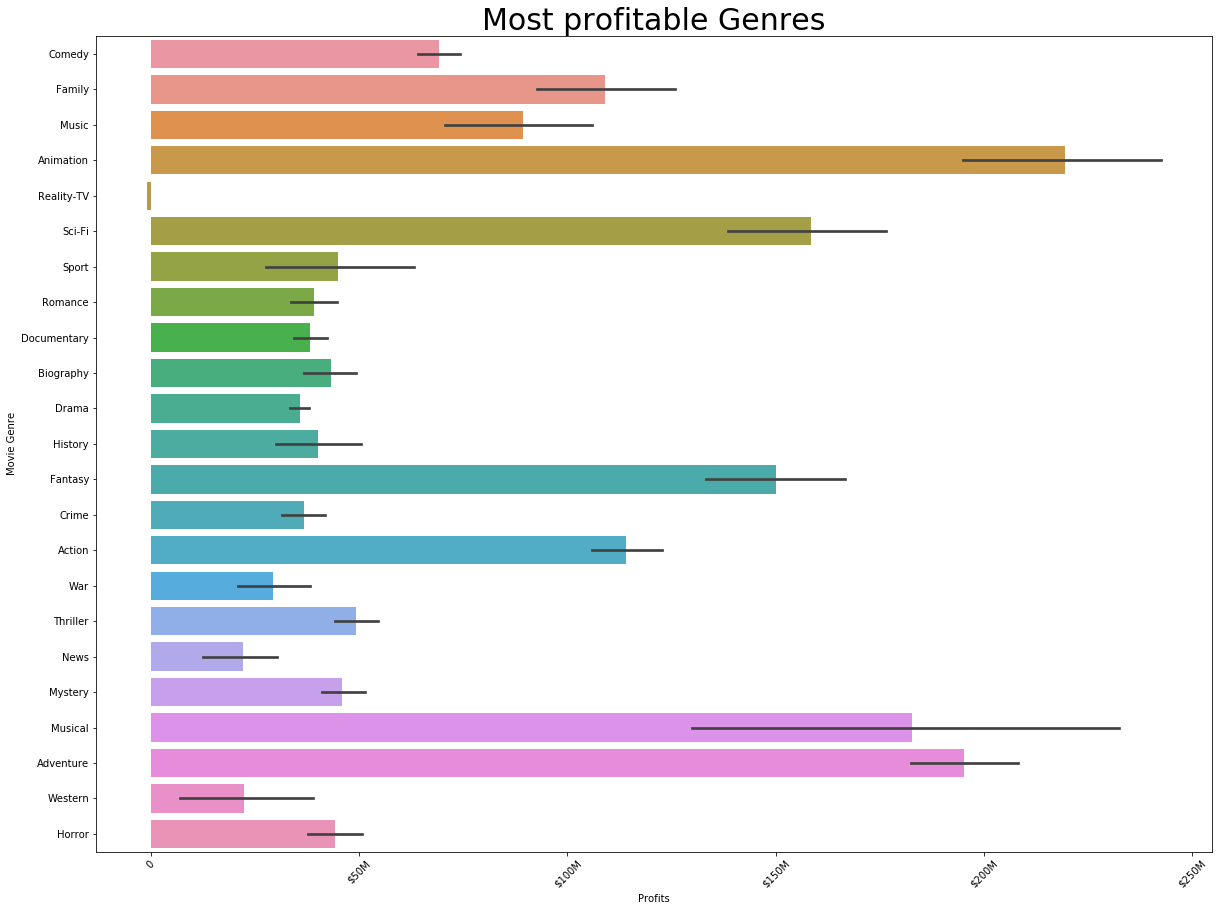

In [29]:
revenue = pd.DataFrame.from_dict(plot_dict['Profits'])

new_figure = plt.figure(figsize=(20,15))
ax = plt.axes()
sns.barplot(data=revenue,orient='h',ci=68).set_title('Most profitable Genres', fontsize = 30)
ax.set(xlabel = 'Profits', ylabel = 'Movie Genre')
plt.xticks(rotation = 45)
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

## Budget - Done
### What's the average budget spent? What average budget had the highest ROI?

In [30]:
#converted production, domestic and worldwide into integers
df_tn_budget['domestic_gross'] = df_tn_budget['domestic_gross'].map(lambda x: float(x.replace(',','').replace('$','')))
df_tn_budget['production_budget'] = df_tn_budget['production_budget'].map(lambda x: float(x.replace(',','').replace('$','')))
df_tn_budget['worldwide_gross'] = df_tn_budget['worldwide_gross'].map(lambda x: float(x.replace(',','').replace('$','')))

In [31]:
df_tn_budget['Profits'] = (df_tn_budget['worldwide_gross'] - df_tn_budget['production_budget'])

In [32]:
df_tn_budget.sort_values(by = ['Profits'], ascending = False, inplace = True)
df_tn_budget.head(100)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...
2159,60,"Feb 25, 2004",The Passion of the Christ,25000000.0,370782930.0,6.223419e+08,5.973419e+08
49,50,"Jun 30, 2004",Spider-Man 2,200000000.0,373524485.0,7.951107e+08,5.951107e+08
126,27,"May 21, 2010",Shrek Forever After,165000000.0,238736787.0,7.562447e+08,5.912447e+08
159,60,"May 15, 2003",The Matrix Reloaded,150000000.0,281553689.0,7.385769e+08,5.885769e+08


In [33]:
display(df_tn_budget.describe())
df = df_tn_budget.drop(['worldwide_gross', 'domestic_gross', 'id', 'movie','release_date'], axis = 1)
df.head()

#finding correlation
correlation = df.corr()

,id,production_budget,domestic_gross,worldwide_gross,Profits
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


In [34]:
budget_mean = df_tn_budget['production_budget'].mean()
budget_mean

31587757.0965064

In [35]:
'https://dfrieds.com/data-visualizations/how-format-large-tick-values.html'

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

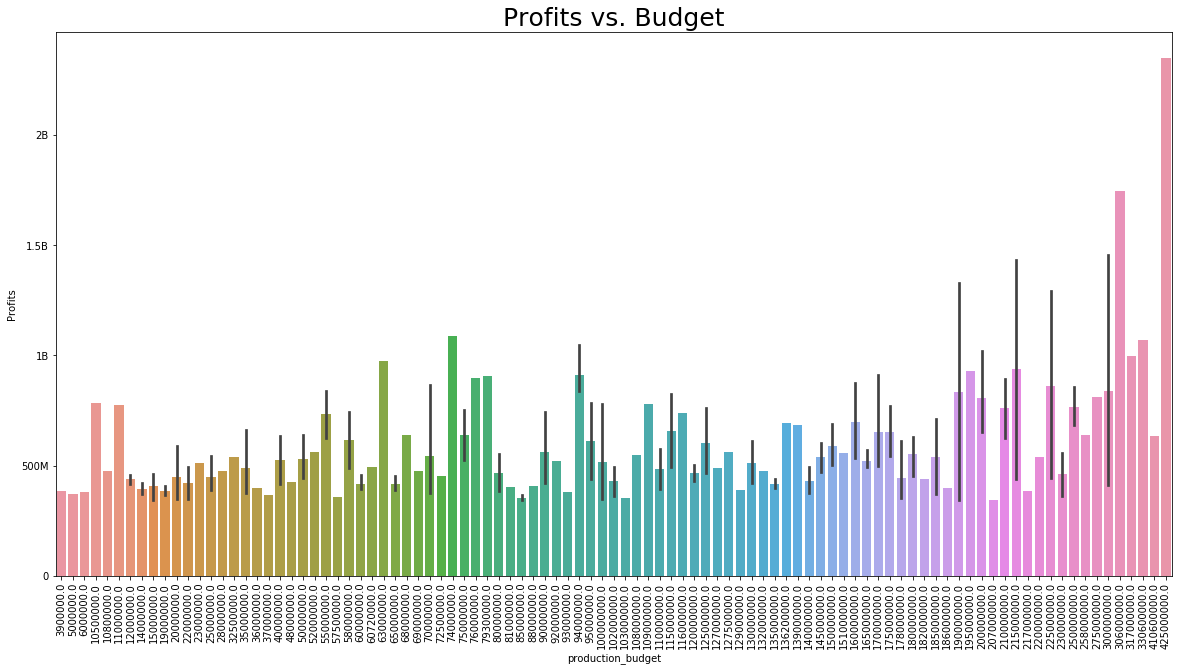

In [36]:
# Fix this / update cells
new_figure = plt.figure(figsize=(20,10))
ax = plt.axes()
sns.barplot(x= df_tn_budget['production_budget'][:250],
            y = df_tn_budget['Profits'][:250],
            ax=ax).set_title('Profits vs. Budget', fontsize = 25)
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));
# sns.regression(x= df_tn_budget['production_budget'][:250],y = df_tn_budget['Profits'][:250],ax=ax);

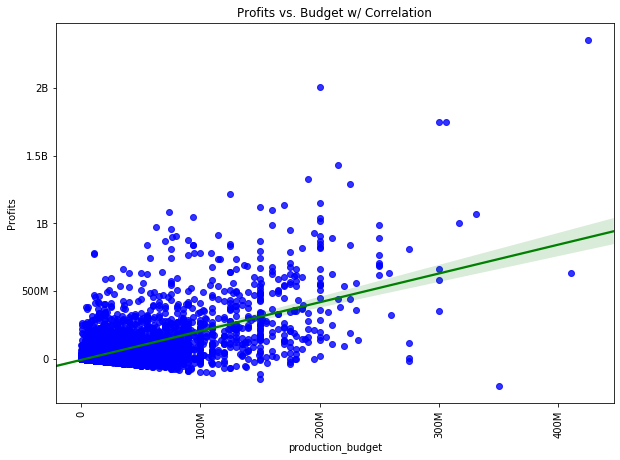

In [51]:
new_figure = plt.figure(figsize=(10,7))
ax = plt.axes()
sns.regplot(x = 'production_budget', y = 'Profits', data = df_tn_budget, color = 'blue', line_kws = {'color':'green'}).set_title('Profits vs. Budget w/ Correlation')
plt.xticks(rotation = 90)
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values))
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

In [38]:
#correlation between profits and budget
corr = correlation['Profits'][0]
round(corr, 2)


0.61

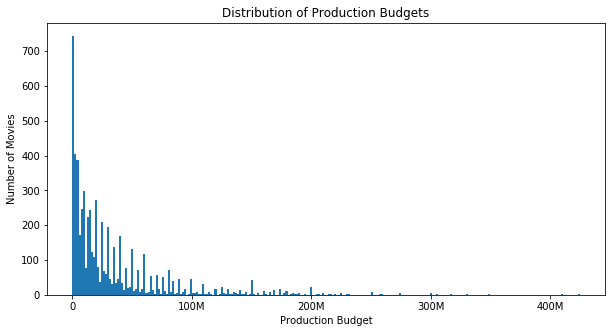

In [39]:
new_figure = plt.figure(figsize=(10,5))
ax = plt.axes()
plt.hist(df_tn_budget['production_budget'], bins = 250)
plt.title('Distribution of Production Budgets')
plt.xlabel('Production Budget')
plt.ylabel('Number of Movies')
ax.xaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));

In the above graph we're able to look at the top 100 highest grossing movies of all time compared to their production budget. The production budget falls within the top 100. My recommendation to Microsoft, is to expect to pay $31,587,757 to yield the highest possibility of a profit.

## Most Profitable Month - Done

In [40]:
df_tn_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,"Dec 19, 1997",Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09
...,...,...,...,...,...,...,...
352,53,"Apr 27, 2001",Town & Country,105000000.0,6712451.0,1.036477e+07,-9.463523e+07
341,42,"Jun 14, 2019",Men in Black: International,110000000.0,3100000.0,3.100000e+06,-1.069000e+08
193,94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-1.104502e+08
194,95,"Dec 31, 2020",Moonfall,150000000.0,0.0,0.000000e+00,-1.500000e+08


In [41]:
df_tn_budget['release_date'] = pd.to_datetime(df_tn_budget['release_date'])
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09


In [42]:
# Creating a new columns called months
df_tn_budget["Month"] = pd.to_datetime(df_tn_budget['release_date'], format='%b', errors='coerce').dt.month
df_tn_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,Month
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,12
42,43,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09,2.008208e+09,12
6,7,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,4
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.747311e+09,12
33,34,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,1.433855e+09,6


In [43]:
df_tn_budget.sort_values(by = 'Month', ascending = True, inplace = True)

In [44]:
'https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name'
#Getting the mean of each month
most_profitable_months = (df_tn_budget.groupby(df_tn_budget['Month'])['Profits'].mean())
most_profitable_months

Month
1     2.572033e+07
2     4.349811e+07
3     4.985129e+07
4     3.611743e+07
5     1.151328e+08
6     9.942391e+07
7     9.841746e+07
8     3.542232e+07
9     2.488078e+07
10    2.907190e+07
11    9.314157e+07
12    6.844157e+07
Name: Profits, dtype: float64

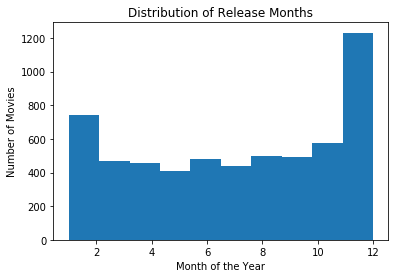

In [45]:
plt.hist(df_tn_budget['Month'])
plt.title('Distribution of Release Months')
plt.xlabel('Month of the Year')
plt.ylabel('Number of Movies');

In [46]:
# As we will see below, even though the most profitable months for movies is in May, 
# studios for some reason still release the majority of their films in December. 
# This could give us a competitive advantage

In [47]:
# Putting names of month rather than the number
'https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name'
import calendar
df_tn_budget['Month'] = df_tn_budget['Month'].apply(lambda x: calendar.month_abbr[x])

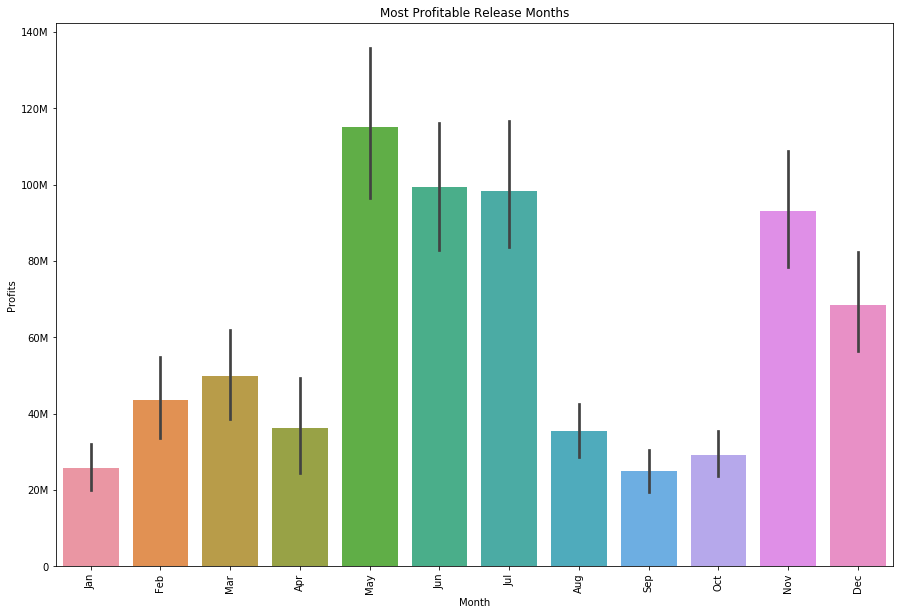

In [48]:
new_figure = plt.figure(figsize=(15,10))
ax = plt.axes()
sns.barplot(x = 'Month', y = 'Profits', data = df_tn_budget, ax=ax).set_title('Most Profitable Release Months')
plt.xticks(rotation = 90)
ax.yaxis.set_major_formatter(FuncFormatter(reformat_large_tick_values));